Tratamento dos Dados

In [1]:
import pandas as pd

# Carregar os arquivos CSV
customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')

# Unir as tabelas baseando-se nas chaves
# Passo 1: Juntar "orders" com "customers"
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

# Passo 2: Juntar "orders_customers" com "order_items"
orders_items = pd.merge(orders_customers, order_items, on='order_id', how='inner')

# Passo 3: Juntar "orders_items" com "products"
orders_products = pd.merge(orders_items, products, on='product_id', how='inner')

# Passo 4: Juntar "orders_products" com "sellers"
orders_sellers = pd.merge(orders_products, sellers, on='seller_id', how='inner')

# Passo 5: Juntar "orders_sellers" com "order_reviews"
final_data = pd.merge(orders_sellers, order_reviews, on='order_id', how='left')

# Passo 6: Juntar com "payments"
final_data = pd.merge(final_data, payments, on='order_id', how='left')

# Exibir o resultado consolidado
final_data
final_data.to_csv('data/full_dataset.csv', index=False)



1. Exploração Geral do Dataset

Quais são as colunas disponíveis? final_data.clumns
Quantos registros (linhas) existem? final_data.info()
Existe algum valor ausente que precise de tratamento? final_data. .isnull().sum()
Perguntas iniciais:

Quantos pedidos, produtos, clientes e vendedores estão no dataset?
Qual o intervalo de datas do dataset (primeiro e último pedido)?

In [ ]:
final_data.sum

2. Quantos pedidos, produtos, clientes e vendedores estão no dataset?

In [5]:
num_pedidos = final_data['order_id'].nunique()
num_produtos = final_data['product_id'].nunique()
num_clientes = final_data['customer_id'].nunique()
num_vendedores = final_data['seller_id'].nunique()

print("Número de pedidos:", num_pedidos)
print("Número de produtos:", num_produtos)
print("Número de clientes:", num_clientes)
print("Número de vendedores:", num_vendedores)


Número de pedidos: 98666
Número de produtos: 32951
Número de clientes: 98666
Número de vendedores: 3095


3. Qual o intervalo de datas do dataset (primeiro e último pedido)?

In [6]:
min_date = final_data['order_purchase_timestamp'].min()
max_date = final_data['order_purchase_timestamp'].max()

print("Primeiro pedido:", min_date)
print("Último pedido:", max_date)


Primeiro pedido: 2016-09-04 21:15:19
Último pedido: 2018-09-03 09:06:57


4. Análise de Satisfação do Cliente
Com os dados de avaliações (review_score):

Distribuição das avaliações:
- Quantas avaliações têm 1, 2, 3, 4 e 5 estrelas?
- Relação entre atrasos e notas: Pedidos atrasados recebem notas menores?
- Palavras comuns em avaliações negativas: Explorar os comentários para identificar padrões.

Distribuição de Avaliações:
review_score
1.0    14857
2.0     4085
3.0     9840
4.0    22286
5.0    66264
Name: count, dtype: int64


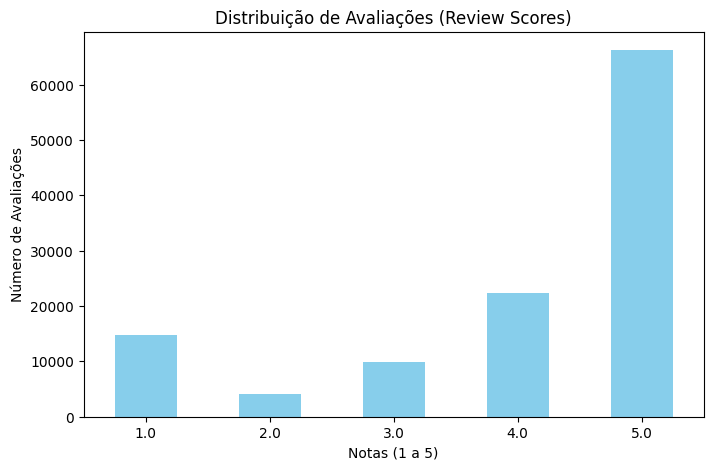

In [ ]:
# Contar a frequência de cada avaliação
review_distribution = final_data['review_score'].value_counts().sort_index()

# Exibir resultados
print("Distribuição de Avaliações:")
print(review_distribution)

# Visualizar em gráfico
import matplotlib.pyplot as plt

review_distribution.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Distribuição de Avaliações (Review Scores)')
plt.xlabel('Notas (1 a 5)')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=0)
plt.show()


5. Relação entre atrasos e notas: Pedidos atrasados recebem notas menores?
Para investigar:
- Calcule se o pedido foi atrasado:
- Use as colunas order_delivered_customer_date e order_estimated_delivery_date.

Média de Avaliação por Atraso:
atrasado
False    4.152716
True     2.546542
Name: review_score, dtype: float64


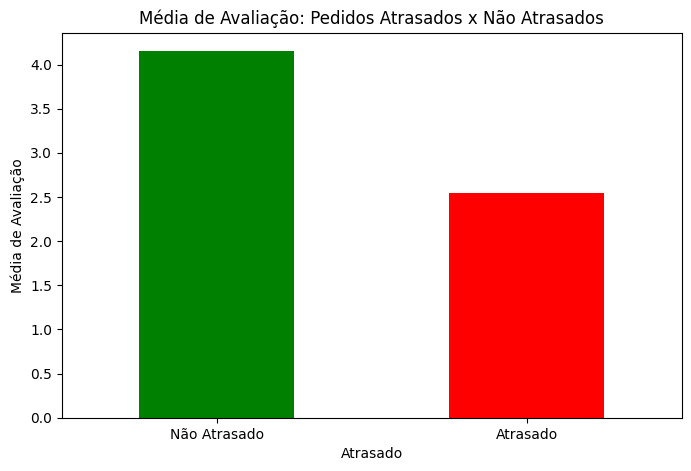

In [8]:
# Criar coluna indicando se o pedido foi atrasado
final_data['atrasado'] = final_data['order_delivered_customer_date'] > final_data['order_estimated_delivery_date']

# Agrupar por atraso e calcular a média das avaliações
atraso_score = final_data.groupby('atrasado')['review_score'].mean()

print("Média de Avaliação por Atraso:")
print(atraso_score)

# Gráfico comparativo
atraso_score.plot(kind='bar', color=['green', 'red'], figsize=(8, 5))
plt.title('Média de Avaliação: Pedidos Atrasados x Não Atrasados')
plt.xlabel('Atrasado')
plt.ylabel('Média de Avaliação')
plt.xticks([0, 1], labels=['Não Atrasado', 'Atrasado'], rotation=0)
plt.show()


6. Análise de Vendas

Com os dados de produtos, pedidos e pagamentos, podemos responder perguntas como:

- Categorias mais vendidas: Quais categorias têm mais vendas?

Categorias mais vendidas:
product_category_name
cama_mesa_banho           11988
beleza_saude              10032
esporte_lazer              9004
moveis_decoracao           8832
informatica_acessorios     8150
utilidades_domesticas      7380
relogios_presentes         6213
telefonia                  4726
ferramentas_jardim         4590
automotivo                 4400
Name: order_id, dtype: int64


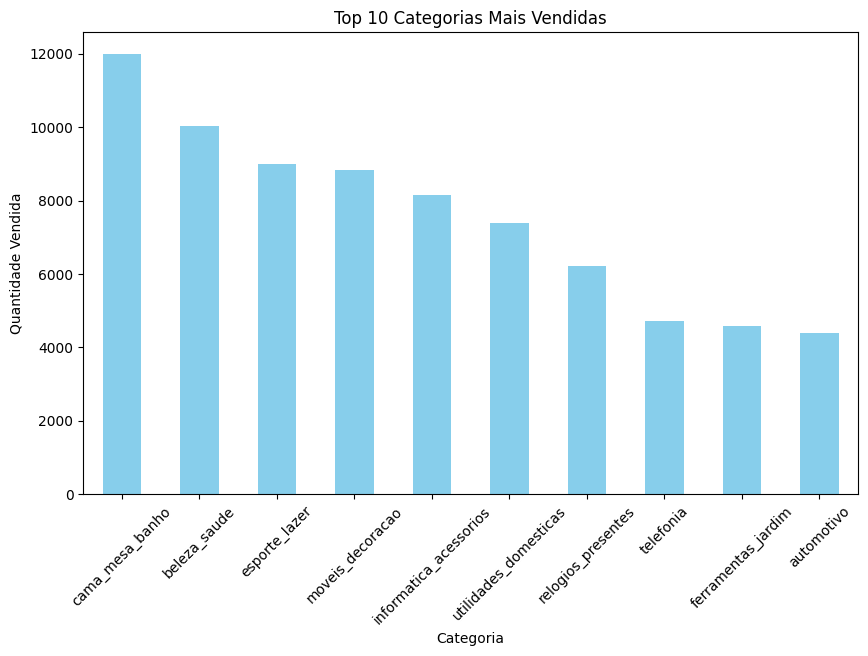

In [9]:
# Contar itens vendidos por categoria
categorias_mais_vendidas = final_data.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)

# Exibir as 10 categorias mais vendidas
print("Categorias mais vendidas:")
print(categorias_mais_vendidas.head(10))

# Visualizar em gráfico
categorias_mais_vendidas.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Categorias Mais Vendidas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()


6. Análise de Vendas

Com os dados de produtos, pedidos e pagamentos, podemos responder perguntas como:

- Faturamento total: Qual foi o faturamento total considerando os valores pagos?

In [10]:
faturamento_total = final_data['payment_value'].sum()
print(f"Faturamento total: R${faturamento_total:,.2f}")

Faturamento total: R$20,416,842.54


6. Análise de Vendas

Com os dados de produtos, pedidos e pagamentos, podemos responder perguntas como:

- Ticket médio por pedido: Qual é o ticket médio?
- Impacto do frete: Existe correlação entre o valor do frete e o preço dos produtos?

In [11]:
ticket_medio = final_data.groupby('order_id')['payment_value'].sum().mean()
print(f"Ticket médio por pedido: R${ticket_medio:,.2f}")

Ticket médio por pedido: R$206.93


6. Análise de Vendas

Com os dados de produtos, pedidos e pagamentos, podemos responder perguntas como:

- Impacto do frete: Existe correlação entre o valor do frete e o preço dos produtos?

Correlação entre frete e preço: 0.42


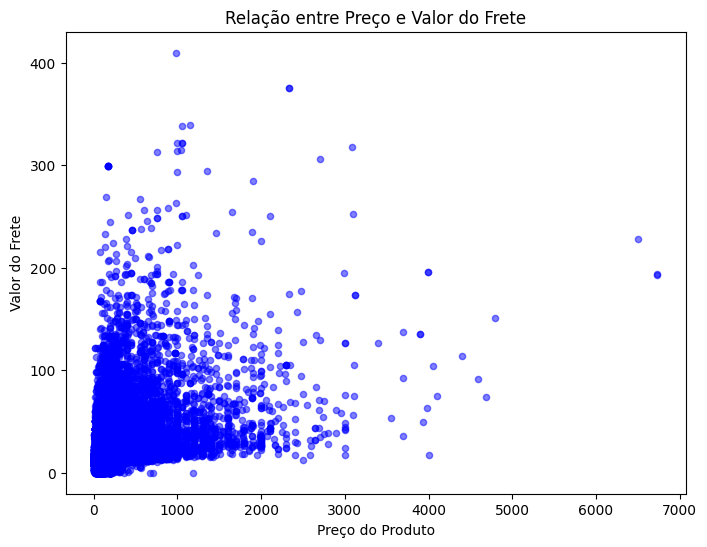

In [12]:
correlacao_frete_preco = final_data['freight_value'].corr(final_data['price'])
print(f"Correlação entre frete e preço: {correlacao_frete_preco:.2f}")

final_data.plot.scatter(x='price', y='freight_value', alpha=0.5, figsize=(8, 6), color='blue')
plt.title('Relação entre Preço e Valor do Frete')
plt.xlabel('Preço do Produto')
plt.ylabel('Valor do Frete')
plt.show()


7. Logística e Entregas
Aqui estão os pontos que analisaremos sobre a logística e entrega dos pedidos:

- Tempo médio de entrega: Qual é o tempo médio entre a data de compra e a entrega?

In [13]:
# Calcular o tempo de entrega em dias
final_data['tempo_entrega'] = (
    pd.to_datetime(final_data['order_delivered_customer_date']) - 
    pd.to_datetime(final_data['order_purchase_timestamp'])
).dt.days

# Calcular o tempo médio de entrega
tempo_medio_entrega = final_data['tempo_entrega'].mean()
print(f"Tempo médio de entrega: {tempo_medio_entrega:.2f} dias")


Tempo médio de entrega: 12.02 dias


7. Logística e Entregas
Aqui estão os pontos que analisaremos sobre a logística e entrega dos pedidos:

- Estados mais rápidos e mais lentos: Quais estados têm os maiores atrasos de entrega?

Estados mais rápidos:
customer_state
SP     8.274160
MG    11.499963
PR    11.523074
DF    12.501430
SC    14.513443
Name: tempo_entrega, dtype: float64

Estados mais lentos:
customer_state
PA    23.268004
AL    24.128090
AM    26.064706
AP    27.662651
RR    27.826087
Name: tempo_entrega, dtype: float64


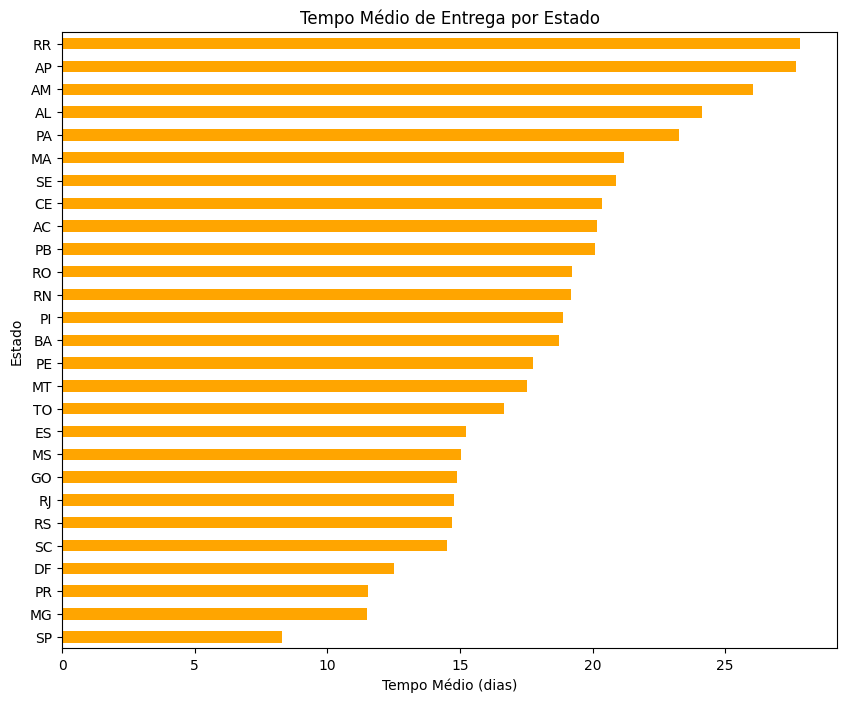

In [14]:
# Calcular tempo médio de entrega por estado
tempo_por_estado = final_data.groupby('customer_state')['tempo_entrega'].mean().sort_values()

# Exibir os 5 estados mais rápidos e mais lentos
print("Estados mais rápidos:")
print(tempo_por_estado.head(5))

print("\nEstados mais lentos:")
print(tempo_por_estado.tail(5))

# Gráfico comparativo
tempo_por_estado.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Tempo Médio de Entrega por Estado')
plt.xlabel('Tempo Médio (dias)')
plt.ylabel('Estado')
plt.show()


7. Logística e Entregas
Aqui estão os pontos que analisaremos sobre a logística e entrega dos pedidos:

- Distribuição geográfica: Mapeamento das vendas por estado ou cidade.

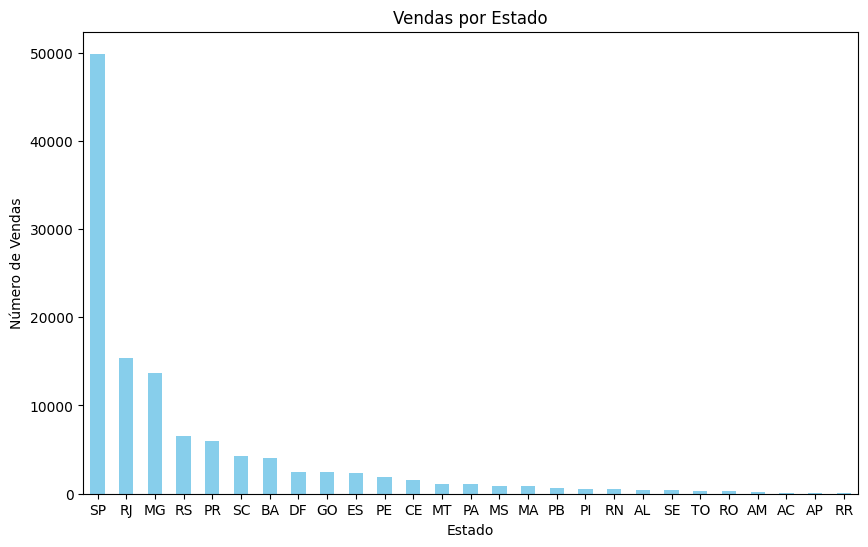

In [15]:
# Contar o número de vendas por estado
vendas_por_estado = final_data['customer_state'].value_counts()

# Gráfico de barras
vendas_por_estado.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.show()

8. Métodos de Pagamento

Nesta análise, exploraremos as seguintes questões:

- Método de pagamento mais usado: Quais métodos de pagamento são mais populares?

Métodos de Pagamento:
payment_type
credit_card    87258
boleto         23018
voucher         6332
debit_card      1699
Name: count, dtype: int64


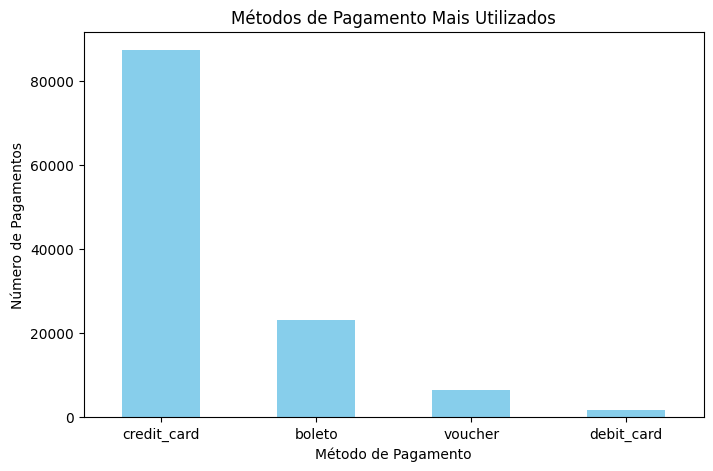

In [16]:
# Contar o número de vezes que cada método foi usado
metodos_pagamento = final_data['payment_type'].value_counts()

# Exibir resultados
print("Métodos de Pagamento:")
print(metodos_pagamento)

# Visualizar em gráfico
metodos_pagamento.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Pagamentos')
plt.xticks(rotation=0)
plt.show()


8. Métodos de Pagamento

Nesta análise, exploraremos as seguintes questões:

- Relação com valores altos: Métodos como cartão de crédito são mais usados para pedidos de maior valor?
- Parcelamento: Qual o número médio de parcelas usadas nos pagamentos?

Valor médio por método de pagamento:
payment_type
credit_card    179.576372
boleto         177.412806
debit_card     149.788599
voucher         64.622344
Name: payment_value, dtype: float64


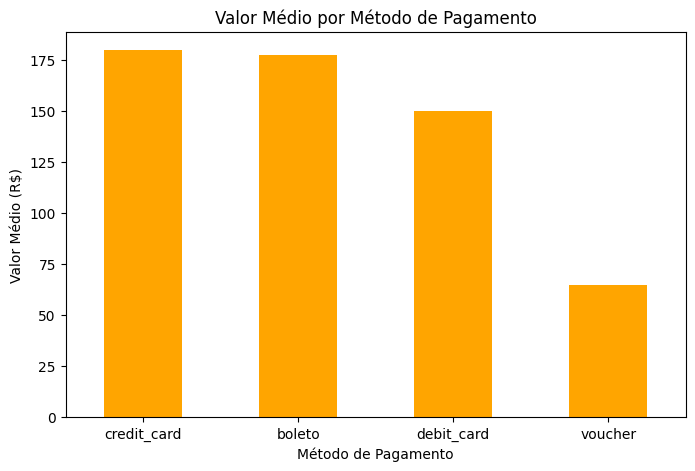

In [17]:
# Calcular o valor médio por método de pagamento
valor_medio_pagamento = final_data.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

# Exibir resultados
print("Valor médio por método de pagamento:")
print(valor_medio_pagamento)

# Gráfico comparativo
valor_medio_pagamento.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Valor Médio por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=0)
plt.show()


8. Métodos de Pagamento

Nesta análise, exploraremos as seguintes questões:

- Parcelamento: Qual o número médio de parcelas usadas nos pagamentos?

Número médio de parcelas: 2.94


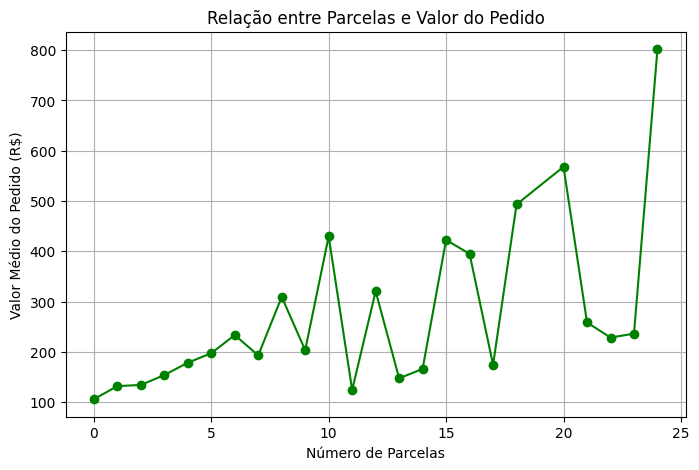

In [18]:
# Calcular o número médio de parcelas
media_parcelas = final_data['payment_installments'].mean()
print(f"Número médio de parcelas: {media_parcelas:.2f}")

# Relação entre parcelas e valor do pedido
parcelas_valor = final_data.groupby('payment_installments')['payment_value'].mean()

# Exibir relação em gráfico
parcelas_valor.plot(kind='line', figsize=(8, 5), marker='o', color='green')
plt.title('Relação entre Parcelas e Valor do Pedido')
plt.xlabel('Número de Parcelas')
plt.ylabel('Valor Médio do Pedido (R$)')
plt.grid(True)
plt.show()


9. Desempenho de Vendedores
Nesta análise, exploraremos as seguintes questões:

- Vendas por vendedor: Quais vendedores realizaram mais vendas?
- Frete médio por vendedor: Quais vendedores têm os fretes mais altos?
- Desempenho regional de vendedores: Existe alguma relação entre o estado do vendedor e o número de vendas?

In [ ]:
# Contar vendas por vendedor
vendas_por_vendedor = final_data['seller_id'].value_counts()

# Exibir os 10 maiores vendedores
print("Top 10 Vendedores com Mais Vendas:")
print(vendas_por_vendedor.head(10))

# Visualizar em gráfico
vendas_por_vendedor.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Vendedores com Mais Vendas')
plt.xlabel('ID do Vendedor')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.show()


9. Desempenho de Vendedores
Nesta análise, exploraremos as seguintes questões:

- Frete médio por vendedor: Quais vendedores têm os fretes mais altos?
- Desempenho regional de vendedores: Existe alguma relação entre o estado do vendedor e o número de vendas?

In [ ]:
# Calcular o frete médio por vendedor
frete_medio_por_vendedor = final_data.groupby('seller_id')['freight_value'].mean().sort_values(ascending=False)

# Exibir os 10 vendedores com maior frete médio
print("Top 10 Vendedores com Maior Frete Médio:")
print(frete_medio_por_vendedor.head(10))

# Visualizar em gráfico
frete_medio_por_vendedor.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Vendedores com Maior Frete Médio')
plt.xlabel('ID do Vendedor')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=45)
plt.show()


9. Desempenho de Vendedores
Nesta análise, exploraremos as seguintes questões:

- Desempenho regional de vendedores: Existe alguma relação entre o estado do vendedor e o número de vendas?

In [ ]:
# Contar vendas por estado do vendedor
vendas_por_estado_vendedor = final_data.groupby('seller_state')['order_id'].count().sort_values(ascending=False)

# Exibir os estados com mais vendas
print("Número de Vendas por Estado dos Vendedores:")
print(vendas_por_estado_vendedor)

# Visualizar em gráfico
vendas_por_estado_vendedor.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Vendas por Estado dos Vendedores')
plt.xlabel('Estado')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.show()
